# Implementing Text Clustering

In [12]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


### Loading AG News Dataset

In [36]:
ag_news_data = pd.read_csv('train.csv')
doc = ag_news_data['Description']
doc = doc[:30000]

### Preprocessing the text
#### Removing special characters, converting into lowercase

In [37]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]','',text)
    text = re.sub(r'\s+',' ',text).strip()
    return text

In [38]:
cleaned_doc = [preprocess_text(i) for i in doc]

## Vectorizing using bag of words

In [39]:
vectorizer = CountVectorizer(stop_words='english',max_features=1000,min_df=5,ngram_range=(1,2))
X = vectorizer.fit_transform(cleaned_doc)

## Range of Cluster numbers to test

In [40]:
cls = range(2,11)
inertia = []
silhouette_avg = []

In [41]:
for n in cls:
    kmeans = KMeans(n_clusters=n,random_state=42)
    kmeans.fit(X)
    labels = kmeans.labels_

    inertia.append(kmeans.inertia_)
    silhouette_avg.append(silhouette_score(X,labels))

## Ploting Elbow Method & Silhoette Scores

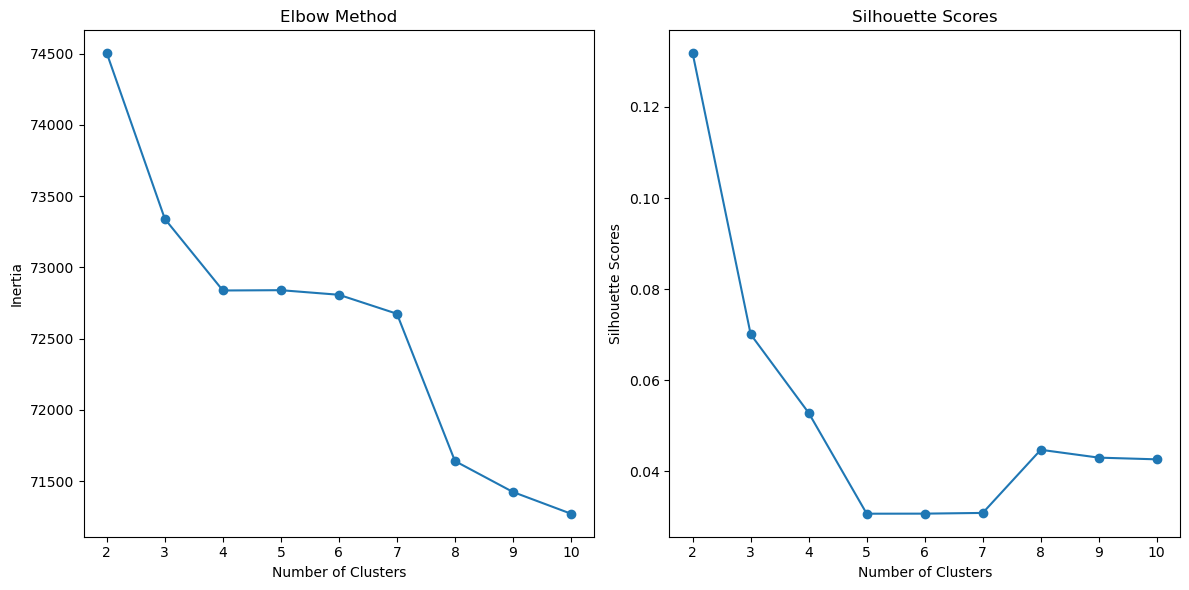

In [17]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(cls,inertia,marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')

plt.subplot(1,2,2)
plt.plot(cls,silhouette_avg,marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Scores')
plt.title('Silhouette Scores')
plt.tight_layout()
plt.show()

#### Can determine that 7 is optimum number of Clusters

## Applying KMeans with 7 clusters

In [19]:
k = 7
kmeans = KMeans(n_clusters=k,random_state=42)
kmeans.fit(X)
labels = kmeans.labels_

### Create a dictionary to hold sentences by cluster

In [21]:
clusters = {i:[] for i in range(k)}
for idx,label in enumerate(labels):
    clusters[label].append(doc[idx])

### Print sentences for each cluster

In [22]:
for cls_num, sentences in clusters.items():
    print(f"Cluster {cls_num}:")
    for sentence in sentences[:5]:
        print(f' - {sentence}')
    print("\n")

Cluster 0:
 - AP - If Hurricane Charley had struck three years ago, President Bush's tour through the wreckage of this coastal city would have been just the sort of post-disaster visit that other presidents have made to the scenes of storms, earthquakes, floods and fires.
 -  CARACAS, Venezuela (Reuters) - Venezuelans voted in huge  numbers on Sunday in a historic referendum on whether to recall  left-wing President Hugo Chavez and electoral authorities  prolonged voting well into the night.
 - Reuters - Democratic challenger John Kerry\has a commanding lead over President Bush in California of 54\percent to 38 percent among likely voters, a poll released on\Tuesday found.
 - CARACAS -- Venezuelans voted resoundingly to keep firebrand populist Hugo Chavez as their president in a victory that drew noisy reactions yesterday from both sides in the streets. International observers certified the results as clean and accurate.
 - TBILISI, Georgia  Georgian President Mikhail Saakashvili appea

### Find key terms for each cluster

In [25]:
terms = vectorizer.get_feature_names_out()
order_centriods = kmeans.cluster_centers_.argsort()[:,::-1]
# Top 10 terms
for i in range(k):
    print(f"Cluster {i}:")
    for ind in order_centriods[i, :10]:  
        print(f' {terms[ind]}')
    print("\n")

Cluster 0:
 president
 bush
 president bush
 said
 john
 reuters
 ap
 kerry
 john kerry
 putin


Cluster 1:
 said
 reuters
 thursday
 monday
 friday
 wednesday
 tuesday
 company
 officials
 corp


Cluster 2:
 end
 month
 left
 ap
 year
 season
 tuesday
 game
 world
 iraq


Cluster 3:
 new
 york
 new york
 reuters
 york reuters
 said
 lta
 monday
 oil
 tuesday


Cluster 4:
 new
 reuters
 ap
 world
 monday
 tuesday
 company
 year
 thursday
 wednesday


Cluster 5:
 reserve
 federal reserve
 new
 stocks
 federal
 new york
 york
 economy
 investors
 higher


Cluster 6:
 years
 seven
 best
 went
 boston
 getting
 germany
 giant
 german
 george


